# Métricas

In [32]:
from sklearn import datasets

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

import pandas as pd

import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics

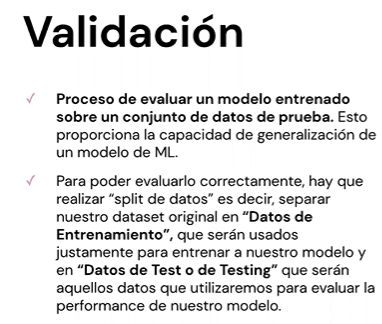

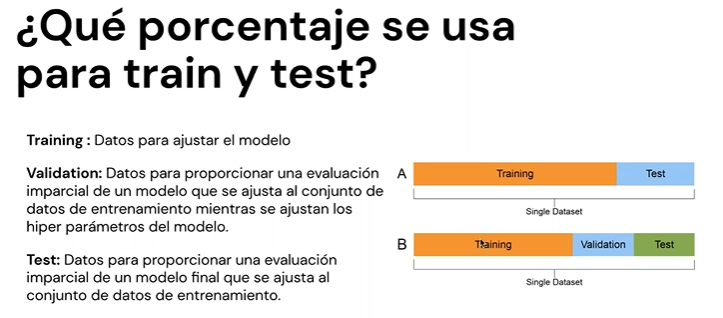

In [2]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

In [3]:
X = data.data #variables predicotras

In [4]:
X.shape

(569, 30)

In [5]:
y = data.target 

In [6]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

# Split en conjunto de prueba y entrenamiento

In [7]:
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3)

In [8]:
from sklearn.linear_model import LogisticRegression

In [56]:
model = LogisticRegression()

# Entrenar modelo

In [57]:
model.fit(X_train, y_train)

C:\Users\USA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [58]:
preds = model.predict(X_test)

In [12]:
#prediccion del modelo
preds

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1])

In [13]:
#son los datos reales
y_test

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1])

# Métricas

* TP es positivo y el modelo acertó 
* TN en negativo y el modelo acertó prediciendo que es negativo

* FP falso postivo, el modelo dice sí pero en realidad no
* FN falso negativo

$Accuracy = \frac{TP + TN}{T}$

In [14]:
TP = y_test[preds == 1].sum()
TP 

98

In [15]:
#Para hacerlo a mano 
TN = (y_test[preds == 0] == 0).sum()
FP = (y_test[preds == 1] == 0).sum()
FN = (y_test[preds == 0] == 1).sum()

In [16]:
T = len(y_test)
T

171

In [17]:
(TP + TN) / T

0.9181286549707602

In [18]:
accuracy_score(y_test, preds)

0.9181286549707602

$Sensitivity = Recall = True\  positive\  rate =  \frac{TP}{TP+FN}$

In [19]:
TP / (TP + FN)

0.9702970297029703

In [20]:
recall_score(y_test, preds)

0.9702970297029703

$Specificity = True\ negative\ rate = \frac{TN}{TN + FP}$

In [21]:
TN / (TN + FP)

0.8428571428571429

In [22]:
recall_score(y_test, preds, pos_label= 0)

0.8428571428571429

Haciendo esa comparación de métricas podemos ver que el modelo tiene una debilidad al calular los True negatives pues esta métrica es menor  a la de calcular los True positives. A esto se le llama un desbalance en el modelo. 

$Precision = \frac{TP}{TP+FP}$

Esta métrica mide de las clases el modelo dijo que es 1.

In [23]:
precision_score(y_test,preds)

0.8990825688073395

$F1\  Score   = 2 \frac{precision\centerdot recall}{precision+recall}$
Esta métrica mezcla precision y recall y así conseguir mezclar buenos resultados.

In [24]:
f1_score(y_test,preds)

0.9333333333333333

Para modelos binarios estas métricas son muy buenas, sin embargo, 

# Matriz de confusión

In [25]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          cmap=plt.cm.Blues):
    title = "Matriz de confusión"

   
    fig, ax = plt.subplots(figsize=(8,8))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
   
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

   
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [26]:
cm= confusion_matrix(y_test,preds)
cm

array([[59, 11],
       [ 3, 98]], dtype=int64)

<AxesSubplot:title={'center':'Matriz de confusión'}, xlabel='Predicted label', ylabel='True label'>

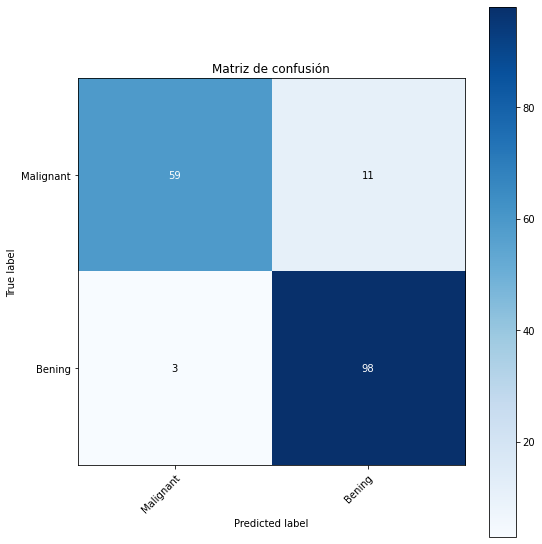

In [27]:
plot_confusion_matrix(y_test,preds,["Malignant","Bening"])

# Curva Roc y AUC

In [28]:
from sklearn.metrics import roc_auc_score

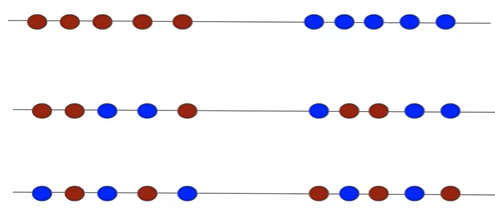

In [29]:
prob= model.predict_proba(X_test)#queremos predecir el valor de la probabilidad
roc_auc_score(y_test,prob[:,1])

0.9803394625176803

# Cross Validation

In [53]:
from sklearn.model_selection import cross_val_score

In [62]:
cross_val_score(model,X_test,y_test,cv=5)

C:\Users\USA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\Users\USA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regress

array([0.97142857, 0.88235294, 0.97058824, 0.94117647, 0.88235294])

In [33]:
data=pd.read_csv("dataset.csv")

In [63]:
X= data[["LotFrontage","LotArea","PoolArea","GrLivArea","BsmtFullBath","Fireplaces","MasVnrArea"]]

In [75]:
X["LotFrontage"]=X["LotFrontage"].fillna(X["LotFrontage"])
X["MasVnrArea"]=X["MasVnrArea"].fillna(X["MasVnrArea"])

C:\Users\USA\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\USA\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [76]:
y=data["SalePrice"]

In [77]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [73]:
X_train,X_test,y_train,y_test= model_selection.train_test_split(X,y,test_size=0.3)

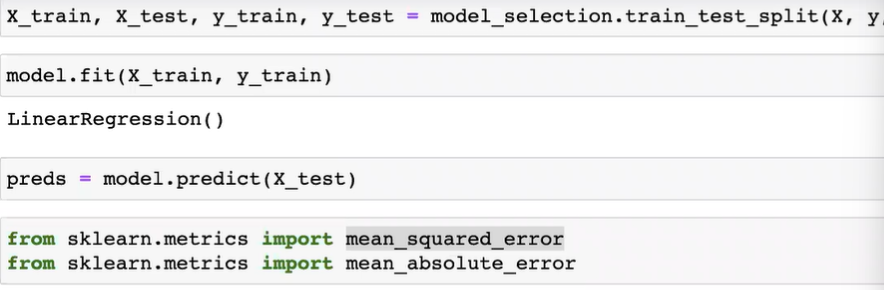

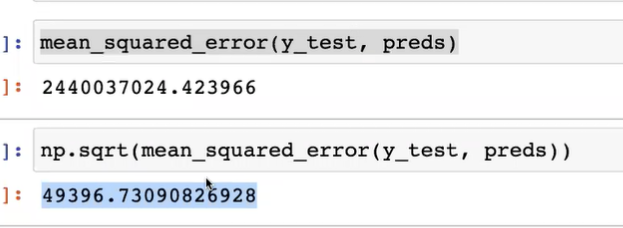

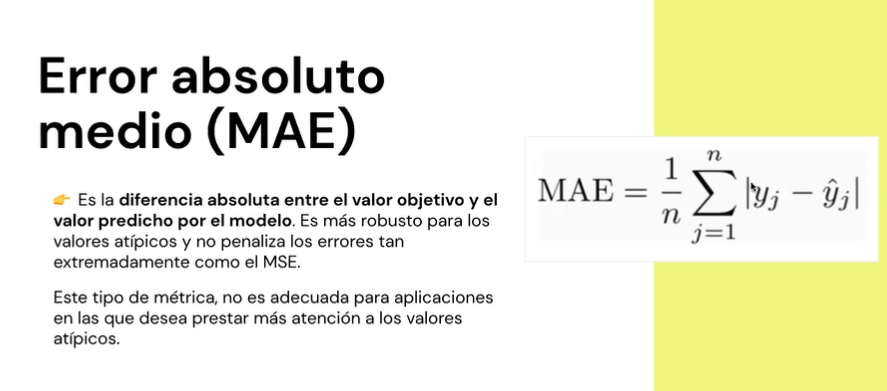